In [52]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [53]:
# Read Data
#genentic = pd.read_csv('Training Data/Training_Genetic_Dataset.csv')
performance_train = pd.read_csv('Training Data/Training_Performance_Dataset.csv')
soil_train = pd.read_csv('Training Data/Training_Soil_Dataset.csv') 
weather_train = pd.read_csv('Training Data/Training_Weather_Dataset.csv') 
performance_validation = pd.read_csv('Training Data/Validation_Performance_Dataset.csv')
performance_test = pd.read_csv('Test Data/Test_Performance_Dataset.csv')
soil_test = pd.read_csv('Test Data/Test_Soil_Dataset.csv')
weather_test = pd.read_csv('Test Data/Test_Weather_Dataset_updated.csv')

In [54]:
soil_train.drop(['Latitude','Longitude'], axis = 1, inplace = True)
weather_train.drop(['Latitude','Longitude'], axis = 1, inplace = True)
perf = pd.merge(performance_train, soil_train, how='left', on='Location_ID')
perf = pd.merge(perf, weather_train, how='left', on=['Location_ID','Year'])
perf.isnull().any().any() # No missing values

False

In [55]:
train_data = perf[perf.Year < 2016].reset_index(drop=True)
validation_data = perf[perf.Year == 2016].reset_index(drop=True)
print(train_data.shape)
print(validation_data.shape)

(127258, 89)
(21194, 89)


In [56]:
train_data.head()

,Hybrid,Year,Maturity_Group,Location_ID,Latitude,Longitude,Yield,Check_Yield,Yield_Difference,s1,...,w_6_3,w_6_4,w_6_5,w_6_6,w_6_7,w_6_8,w_6_9,w_6_10,w_6_11,w_6_12
0,P1001:P2030,2015,7,1796,32.87139,-82.22186,123.0466,120.2192,2.827433,17.5,...,2.31614,2.88061,1.97344,2.18712,1.91469,1.91488,2.36521,2.14285,2.69760,3.18961
1,P1001:P2030,2015,7,1797,31.51173,-83.54650,146.7642,174.3994,-27.635230,7.5,...,2.60048,3.37347,2.29799,2.36351,1.95420,2.21183,2.54894,2.68904,3.21849,3.33583
2,P1001:P2030,2015,7,1803,32.03686,-84.37093,141.7510,172.5574,-30.806430,19.8,...,2.40872,3.10122,2.21947,2.20672,1.88176,2.00333,2.42263,2.36745,2.94502,3.16100
3,P1001:P2030,2015,7,1807,34.50156,-79.25756,122.8936,130.9595,-8.065933,15.3,...,1.78054,2.17184,1.82686,2.25245,1.79615,1.61161,2.40540,1.89272,2.38507,3.16100
4,P1001:P2030,2015,7,1798,32.28644,-96.68565,86.9373,85.7655,1.171800,36.7,...,2.24010,2.91816,2.71677,2.74896,2.76421,2.78046,3.01399,3.00041,2.63249,2.33454


In [57]:
validation_data.head()

,Hybrid,Year,Maturity_Group,Location_ID,Latitude,Longitude,Yield,Check_Yield,Yield_Difference,s1,...,w_6_3,w_6_4,w_6_5,w_6_6,w_6_7,w_6_8,w_6_9,w_6_10,w_6_11,w_6_12
0,P1000:P2030,2016,8,2113,36.29419,-76.31354,145.8371,162.24720,-16.410100,19.8,...,1.99544,1.27532,1.43426,1.31824,2.09249,2.34451,2.99677,2.64820,1.43011,1.81323
1,P1000:P2030,2016,8,2244,28.78775,-96.84418,89.2811,84.57587,4.705233,34.2,...,3.41712,3.46265,3.40252,3.16707,3.14616,3.07109,3.84650,3.97538,3.95207,3.28815
2,P1000:P2030,2016,8,2241,32.87210,-82.21630,166.3309,167.86330,-1.532433,15.2,...,2.47154,2.06388,1.81639,2.11526,2.08591,2.26869,2.54320,2.23983,1.70792,2.32818
3,P1000:P2030,2016,8,2247,29.21960,-95.99060,93.8248,95.90233,-2.077533,36.3,...,3.32124,3.45796,3.28736,3.12787,3.07372,3.05846,3.81779,3.95497,3.86526,3.31040
4,P1000:P2030,2016,8,2235,30.54635,-96.43408,98.8735,119.82100,-20.947500,32.2,...,2.74265,2.76796,2.65395,2.82082,2.79714,2.72360,3.29532,3.20460,3.20981,2.66830


## PCA on Weather

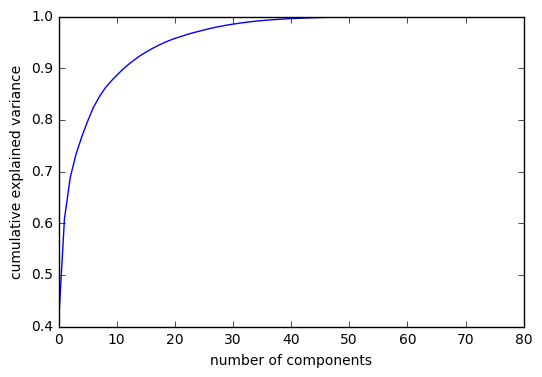

In [58]:
# Set up the data
X_weather = train_data.loc[:,'w_1_1':'w_6_12']

# Fit the 
pca = PCA().fit(X_weather)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [59]:
pca_model = PCA(n_components=25) # Hyperparameters
pca_model.fit(X_weather) # Fit the data
components = pca_model.transform(X_weather) # Principal Components
components.shape

(127258, 25)

In [60]:
# Save the components to the train data frame
components = pd.DataFrame(components)
components = components.add_prefix('Weather_')
components.head()

,Weather_0,Weather_1,Weather_2,Weather_3,Weather_4,Weather_5,Weather_6,Weather_7,Weather_8,Weather_9,...,Weather_15,Weather_16,Weather_17,Weather_18,Weather_19,Weather_20,Weather_21,Weather_22,Weather_23,Weather_24
0,15.804711,-7.075841,-0.322502,2.224051,-1.290587,0.511878,0.581647,0.351829,0.420631,1.346794,...,-2.410298,0.902906,0.767092,0.533088,-0.227388,0.159211,0.471623,0.231444,0.858861,-0.441019
1,17.347773,-7.673623,-1.057533,2.364734,-1.770893,0.156538,0.256205,0.730314,0.963029,0.046716,...,-1.814180,1.959462,0.392867,1.033821,-1.527795,-0.095889,0.134007,1.311053,0.857089,-0.803889
2,16.616942,-7.904347,-0.864540,3.013383,-1.829765,0.494814,1.824500,0.448038,-0.202982,0.780414,...,-3.046363,0.348856,0.386274,0.145024,-0.657268,1.508785,-1.562996,-0.439383,1.313463,-1.050378
3,13.514701,-7.091293,-0.716687,2.758248,-0.589067,-0.208848,0.091153,0.106709,0.299814,0.530773,...,-3.074473,1.976188,1.047629,-0.167470,1.764866,0.172444,1.226152,0.732714,0.601343,-0.077445
4,16.760708,-8.320798,-1.073313,-2.733781,2.110120,1.841458,-0.654421,-4.638687,-0.486418,-0.740931,...,-1.206548,0.545960,-0.441931,0.511811,3.542156,0.659255,1.271142,0.826421,0.359024,-1.030617


In [61]:
train_data = pd.merge(train_data, components, left_index=True, right_index=True)
train_data.head()

,Hybrid,Year,Maturity_Group,Location_ID,Latitude,Longitude,Yield,Check_Yield,Yield_Difference,s1,...,Weather_15,Weather_16,Weather_17,Weather_18,Weather_19,Weather_20,Weather_21,Weather_22,Weather_23,Weather_24
0,P1001:P2030,2015,7,1796,32.87139,-82.22186,123.0466,120.2192,2.827433,17.5,...,-2.410298,0.902906,0.767092,0.533088,-0.227388,0.159211,0.471623,0.231444,0.858861,-0.441019
1,P1001:P2030,2015,7,1797,31.51173,-83.54650,146.7642,174.3994,-27.635230,7.5,...,-1.814180,1.959462,0.392867,1.033821,-1.527795,-0.095889,0.134007,1.311053,0.857089,-0.803889
2,P1001:P2030,2015,7,1803,32.03686,-84.37093,141.7510,172.5574,-30.806430,19.8,...,-3.046363,0.348856,0.386274,0.145024,-0.657268,1.508785,-1.562996,-0.439383,1.313463,-1.050378
3,P1001:P2030,2015,7,1807,34.50156,-79.25756,122.8936,130.9595,-8.065933,15.3,...,-3.074473,1.976188,1.047629,-0.167470,1.764866,0.172444,1.226152,0.732714,0.601343,-0.077445
4,P1001:P2030,2015,7,1798,32.28644,-96.68565,86.9373,85.7655,1.171800,36.7,...,-1.206548,0.545960,-0.441931,0.511811,3.542156,0.659255,1.271142,0.826421,0.359024,-1.030617


In [62]:
# Principal Components for the Validation Set
X_weather = validation_data.loc[:,'w_1_1':'w_6_12']
pca_model.fit(X_weather) # Fit the data
components = pca_model.transform(X_weather) # Principal Components
components = pd.DataFrame(components) # 
components = components.add_prefix('Weather_')
validation_data = pd.merge(validation_data, components, left_index=True, right_index=True)

## PCA on Soil

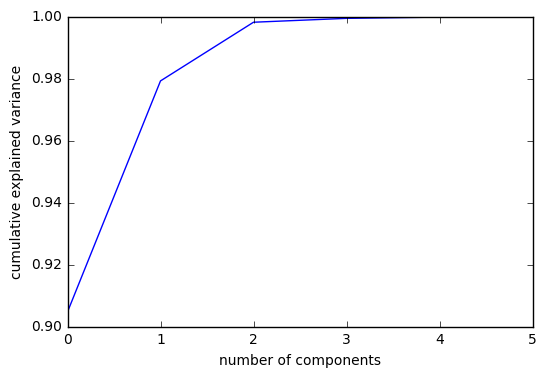

In [63]:
# Set up the data
X_soil = train_data.loc[:,'s1':'s6']

# Fit the 
pca = PCA().fit(X_soil)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [64]:
pca_model = PCA(n_components=2) # Hyperparameters
pca_model.fit(X_soil) # Fit the data
components = pca_model.transform(X_soil) # Principal Components
components.shape

(127258, 2)

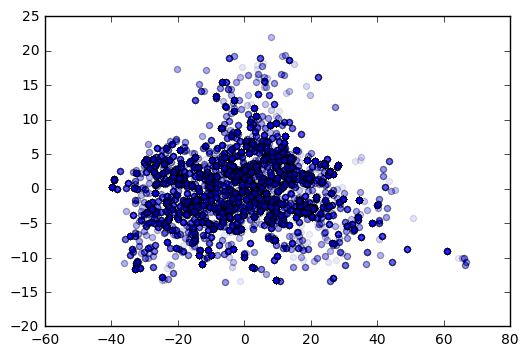

In [65]:
components = pd.DataFrame(components)
components = components.add_prefix('Soil_')
plt.scatter(components.Soil_0, components.Soil_1, alpha=0.01)
plt.show()

In [66]:
components.reset_index()
components.head()

,Soil_0,Soil_1
0,40.457864,-1.468410
1,66.232548,-9.993678
2,41.638178,1.808563
3,30.879467,-5.381108
4,1.046103,16.452443


In [67]:
train_data = pd.merge(train_data, components, left_index=True, right_index=True)
train_data.columns

Index(['Hybrid', 'Year', 'Maturity_Group', 'Location_ID', 'Latitude',
       'Longitude', 'Yield', 'Check_Yield', 'Yield_Difference', 's1',
       ...
       'Weather_17', 'Weather_18', 'Weather_19', 'Weather_20', 'Weather_21',
       'Weather_22', 'Weather_23', 'Weather_24', 'Soil_0', 'Soil_1'],
      dtype='object', length=116)

In [68]:
# Principal Components for the Validation Set
X_weather = validation_data.loc[:,'s1':'s6']
pca_model.fit(X_soil) # Fit the data
components = pca_model.transform(X_soil) # Principal Components
components = pd.DataFrame(components) # 
components = components.add_prefix('Soil_')
validation_data = pd.merge(validation_data, components, left_index=True, right_index=True)

## Yield Prediction

In [84]:
# Set-up the predictors and the response  
X_train = train_data.loc[:,'Weather_0':'Soil_1']
y_train = train_data.loc[:,'Yield']
X_validate = validation_data.loc[:,'Weather_0':'Soil_1']
y_validate = validation_data.loc[:,'Yield']

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(127258, 27)
(127258,)
(21194, 27)
(21194,)


In [85]:
# Fit a Model
bst_tree_y = GradientBoostingRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, loss='lad')
bst_tree_y.fit(X_train, y_train)
yield_pred = bst_tree_y.predict(X_validate)

# Evaluate Fit
mse = mean_squared_error(y_validate, yield_pred)
r2 = r2_score(y_validate, yield_pred)
print('MSE: ',mse)
print('R-squared: ',r2)

MSE:  609.322777755
R-squared:  -0.237290873089


In [86]:
mse = mean_squared_error(y_train, bst_tree_y.predict(X_train))
r2 = r2_score(y_train, bst_tree_y.predict(X_train))
print('MSE: ',mse)
print('R-squared: ',r2)

MSE:  232.836778392
R-squared:  0.709552843055


## Check_Yield Prediction

In [71]:
# Set-up the predictors and the response  
X_train = train_data.loc[:,'Weather_0':'Soil_1']
y_train = train_data.loc[:,'Check_Yield']
X_validate = validation_data.loc[:,'Weather_0':'Soil_1']
y_validate = validation_data.loc[:,'Check_Yield']

# Fit a Model
bst_tree_cy = GradientBoostingRegressor(n_estimators=500, max_depth=6, learning_rate=0.1, loss='huber', alpha=0.95)
bst_tree_cy.fit(X_train, y_train)
check_yield_pred = bst_tree_cy.predict(X_validate)

# Evaluate Fit
mse = mean_squared_error(y_validate, check_yield_pred)
r2 = r2_score(y_validate, yield_pred)
print('MSE: ',mse)
print('R-squared: ',r2)

MSE:  547.84301864
R-squared:  -0.826837610313


In [87]:
# R-squared if we just used the mean instead of a model
round(r2_score(y_validate, pd.Series(np.full(21194,y_validate.mean()))))

0.0

In [ ]:
y_mean = train_data.loc[:,'Yield'].mean()
cy_mean = train_data.loc[:,'Check_Yield'].mean()

y_pred = pd.Series(np.full(21194,y_mean))
cy_pred = pd.Series(np.full(21194,cy_mean))

yd_pred = y_pred - cy_pred
yd_true = train_data.loc[:,'Yield_Difference']
round(r2_score(y_validate, pd.Series(np.full(21194,y_validate.mean()))))
